# Importing the Libraries

In [1]:
!pip install pandas numpy seaborn scikit-learn  --quiet

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
#replacing zero values with null values
Replace_0 = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[Replace_0] = data[Replace_0].replace(0, np.nan)

In [10]:
#removing rows if they contain more than 3 null values
rows_to_drop = data[data.isnull().sum(axis=1) > 3].index
data.drop(rows_to_drop, inplace=True)
data.reset_index(drop=True, inplace=True)

In [11]:
data.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.297571  110.873727      70.877339      27.235457  130.287879   
1           4.846442  142.422642      75.321429      33.000000  206.846154   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.859674                  0.432261  31.285425  
1        35.406767                  0.551584  37.093633

In [12]:
print("Value Counts:", data['Outcome'].value_counts())

Value Counts: Outcome
0    494
1    267
Name: count, dtype: int64


In [13]:
data.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                46
SkinThickness                50
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    515
Age                          52
Outcome                       2
dtype: int64

In [14]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                28
SkinThickness               220
Insulin                     367
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
#filling null values with the mean for each column
columns_fill = ['Glucose', 'BloodPressure', 'SkinThickness','BMI', 'Insulin', 'Age']
mean_values = data[columns_fill].mean()
data[columns_fill] = data[columns_fill].fillna(mean_values)

In [16]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Dataset is ready

# Data Visualization

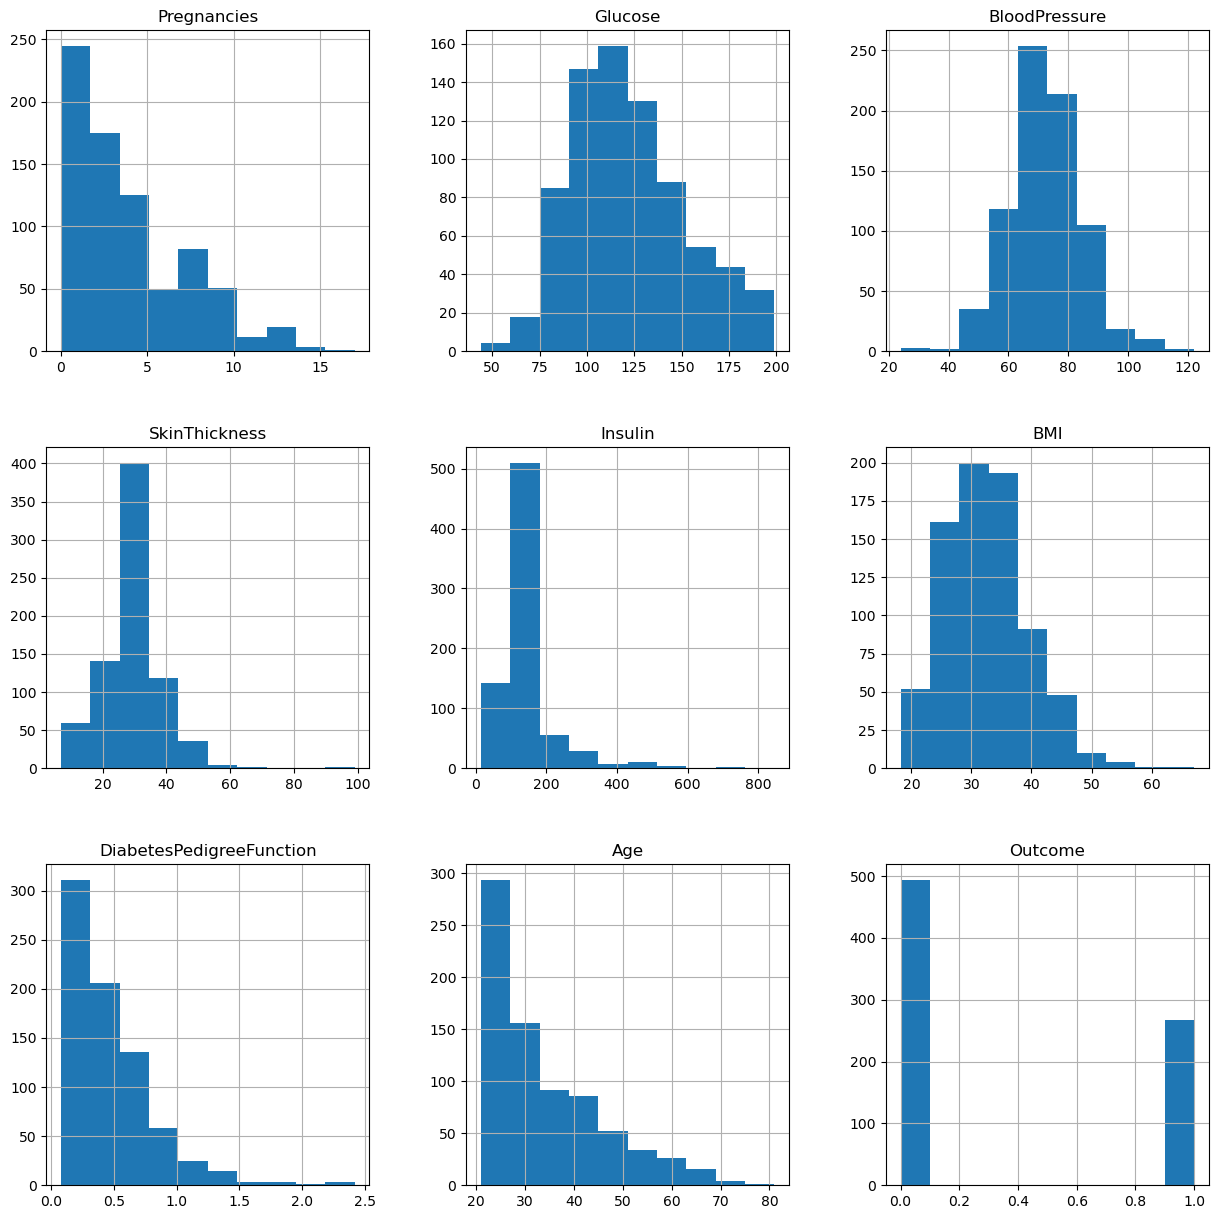

In [17]:
plots = data.hist(figsize=(15,15))

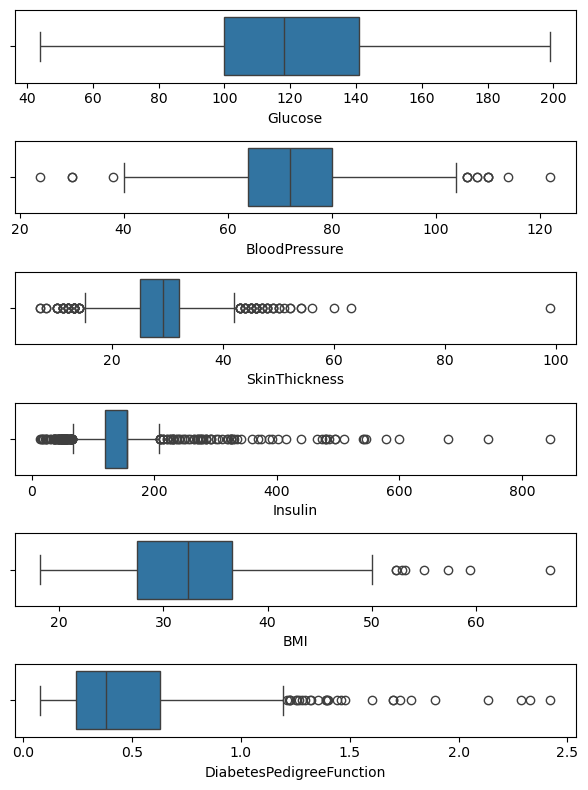

In [18]:
#Boxplots of Different Features in Diabetes Dataset
fig, axes = plt.subplots(6, 1, figsize=(6, 8))

sns.boxplot(x=data['Glucose'],ax=axes[0])
sns.boxplot(x=data['BloodPressure'],ax=axes[1])
sns.boxplot(x=data['SkinThickness'],ax=axes[2])
sns.boxplot(x=data['Insulin'],ax=axes[3])
sns.boxplot(x=data['BMI'],ax=axes[4])
sns.boxplot(x=data['DiabetesPedigreeFunction'],ax=axes[5])
plt.tight_layout()
plt.show()

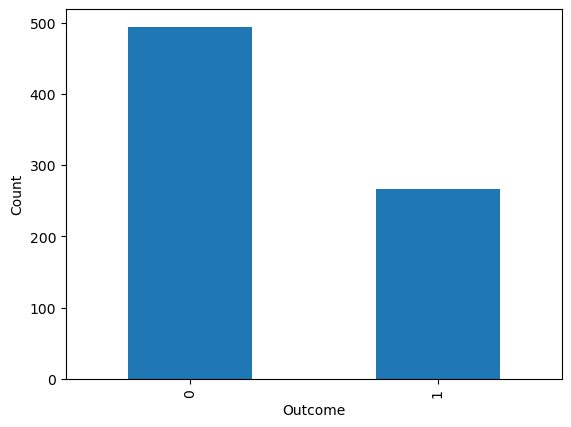

In [19]:
#Distribution of Outcome Classes in the Dataset
plots =data.Outcome.value_counts().plot(kind="bar")
plots.set_xlabel("Outcome")
plots.set_ylabel("Count")
plt.show()

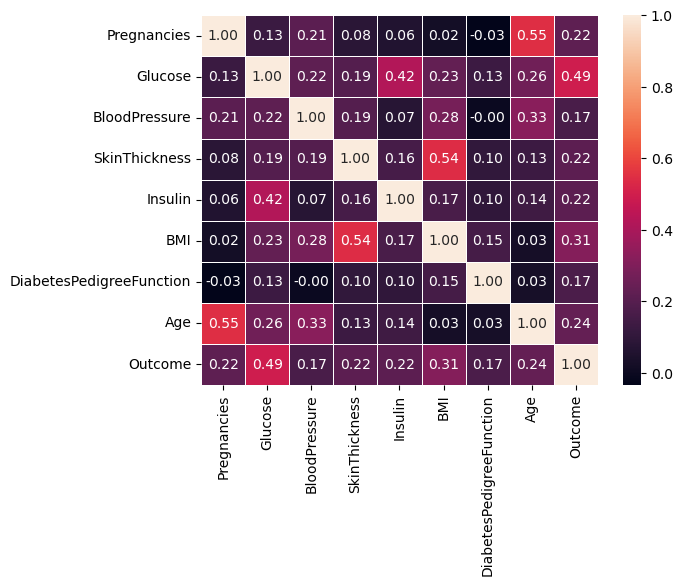

In [20]:
#Correlation Heatmap of Dataset Features
sns.heatmap(data.corr(), annot=True, fmt=".2f", lw=0.5)
plt.show()

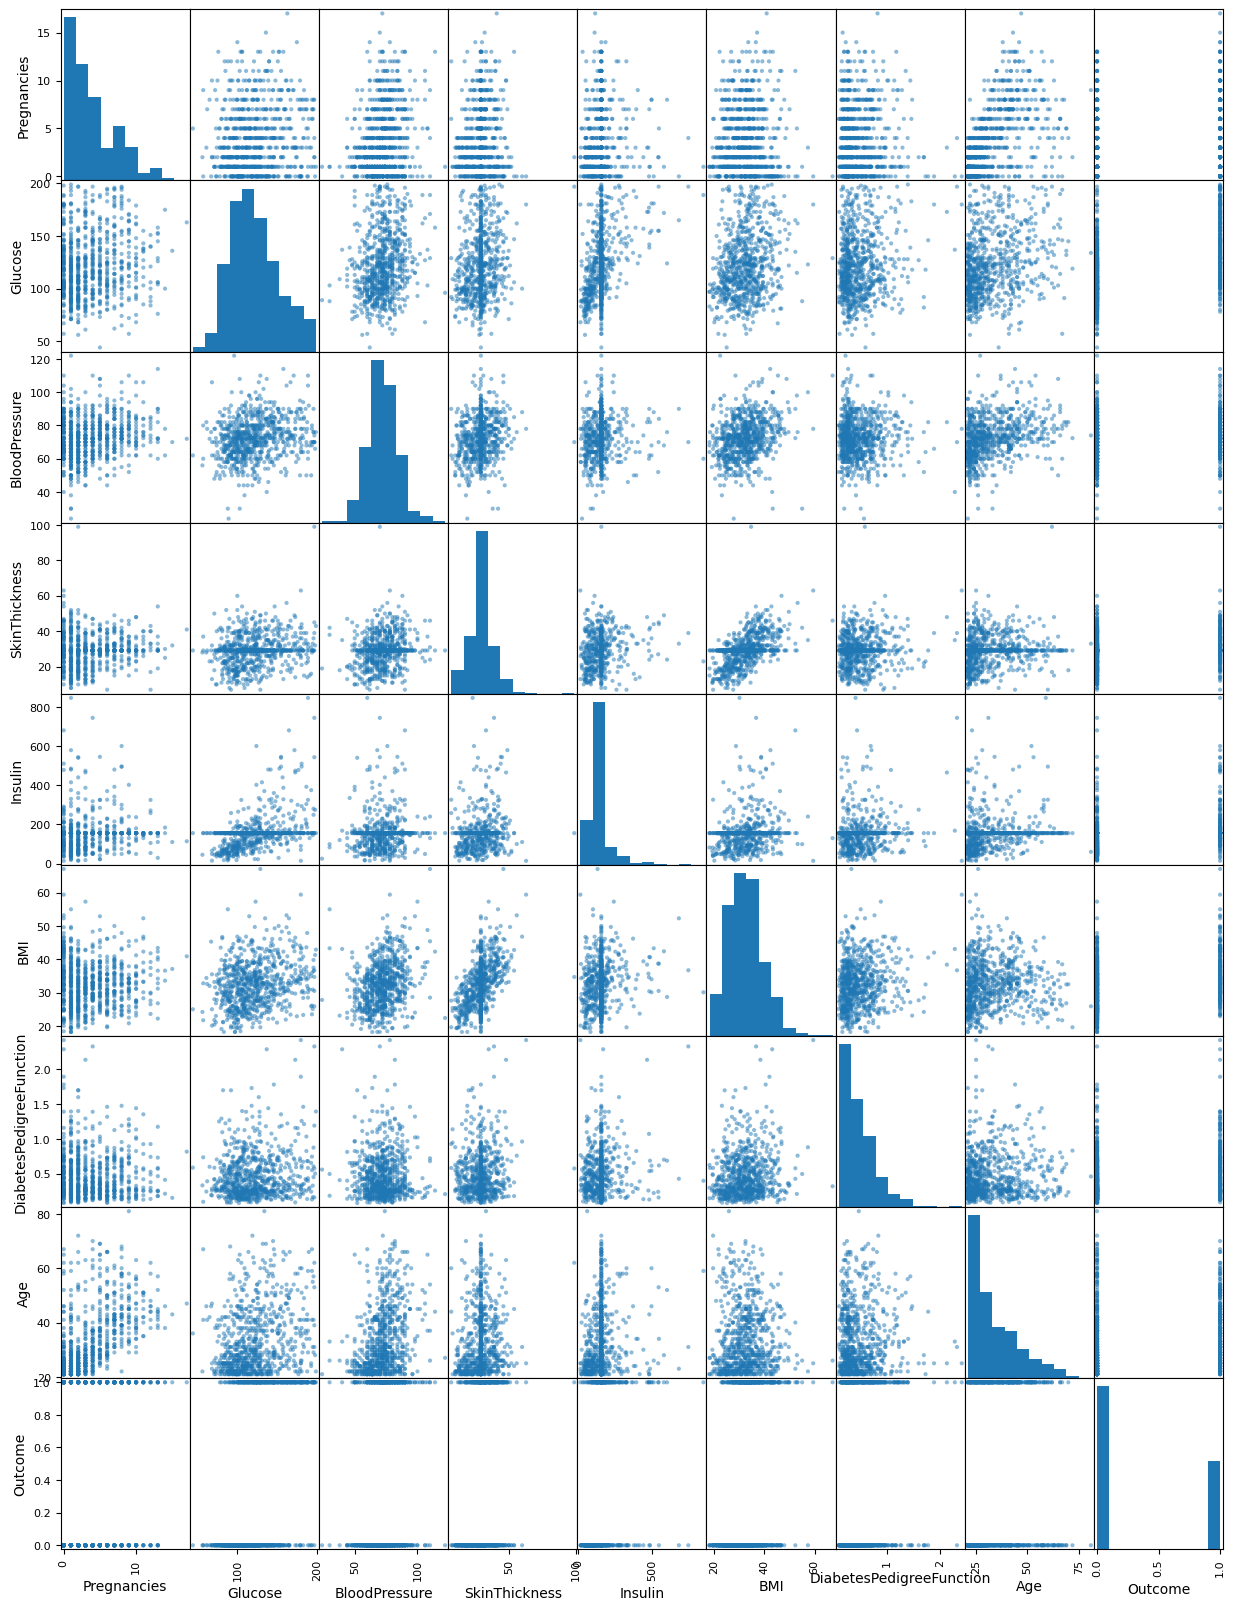

In [21]:
plots = scatter_matrix(data , figsize=(15,20))

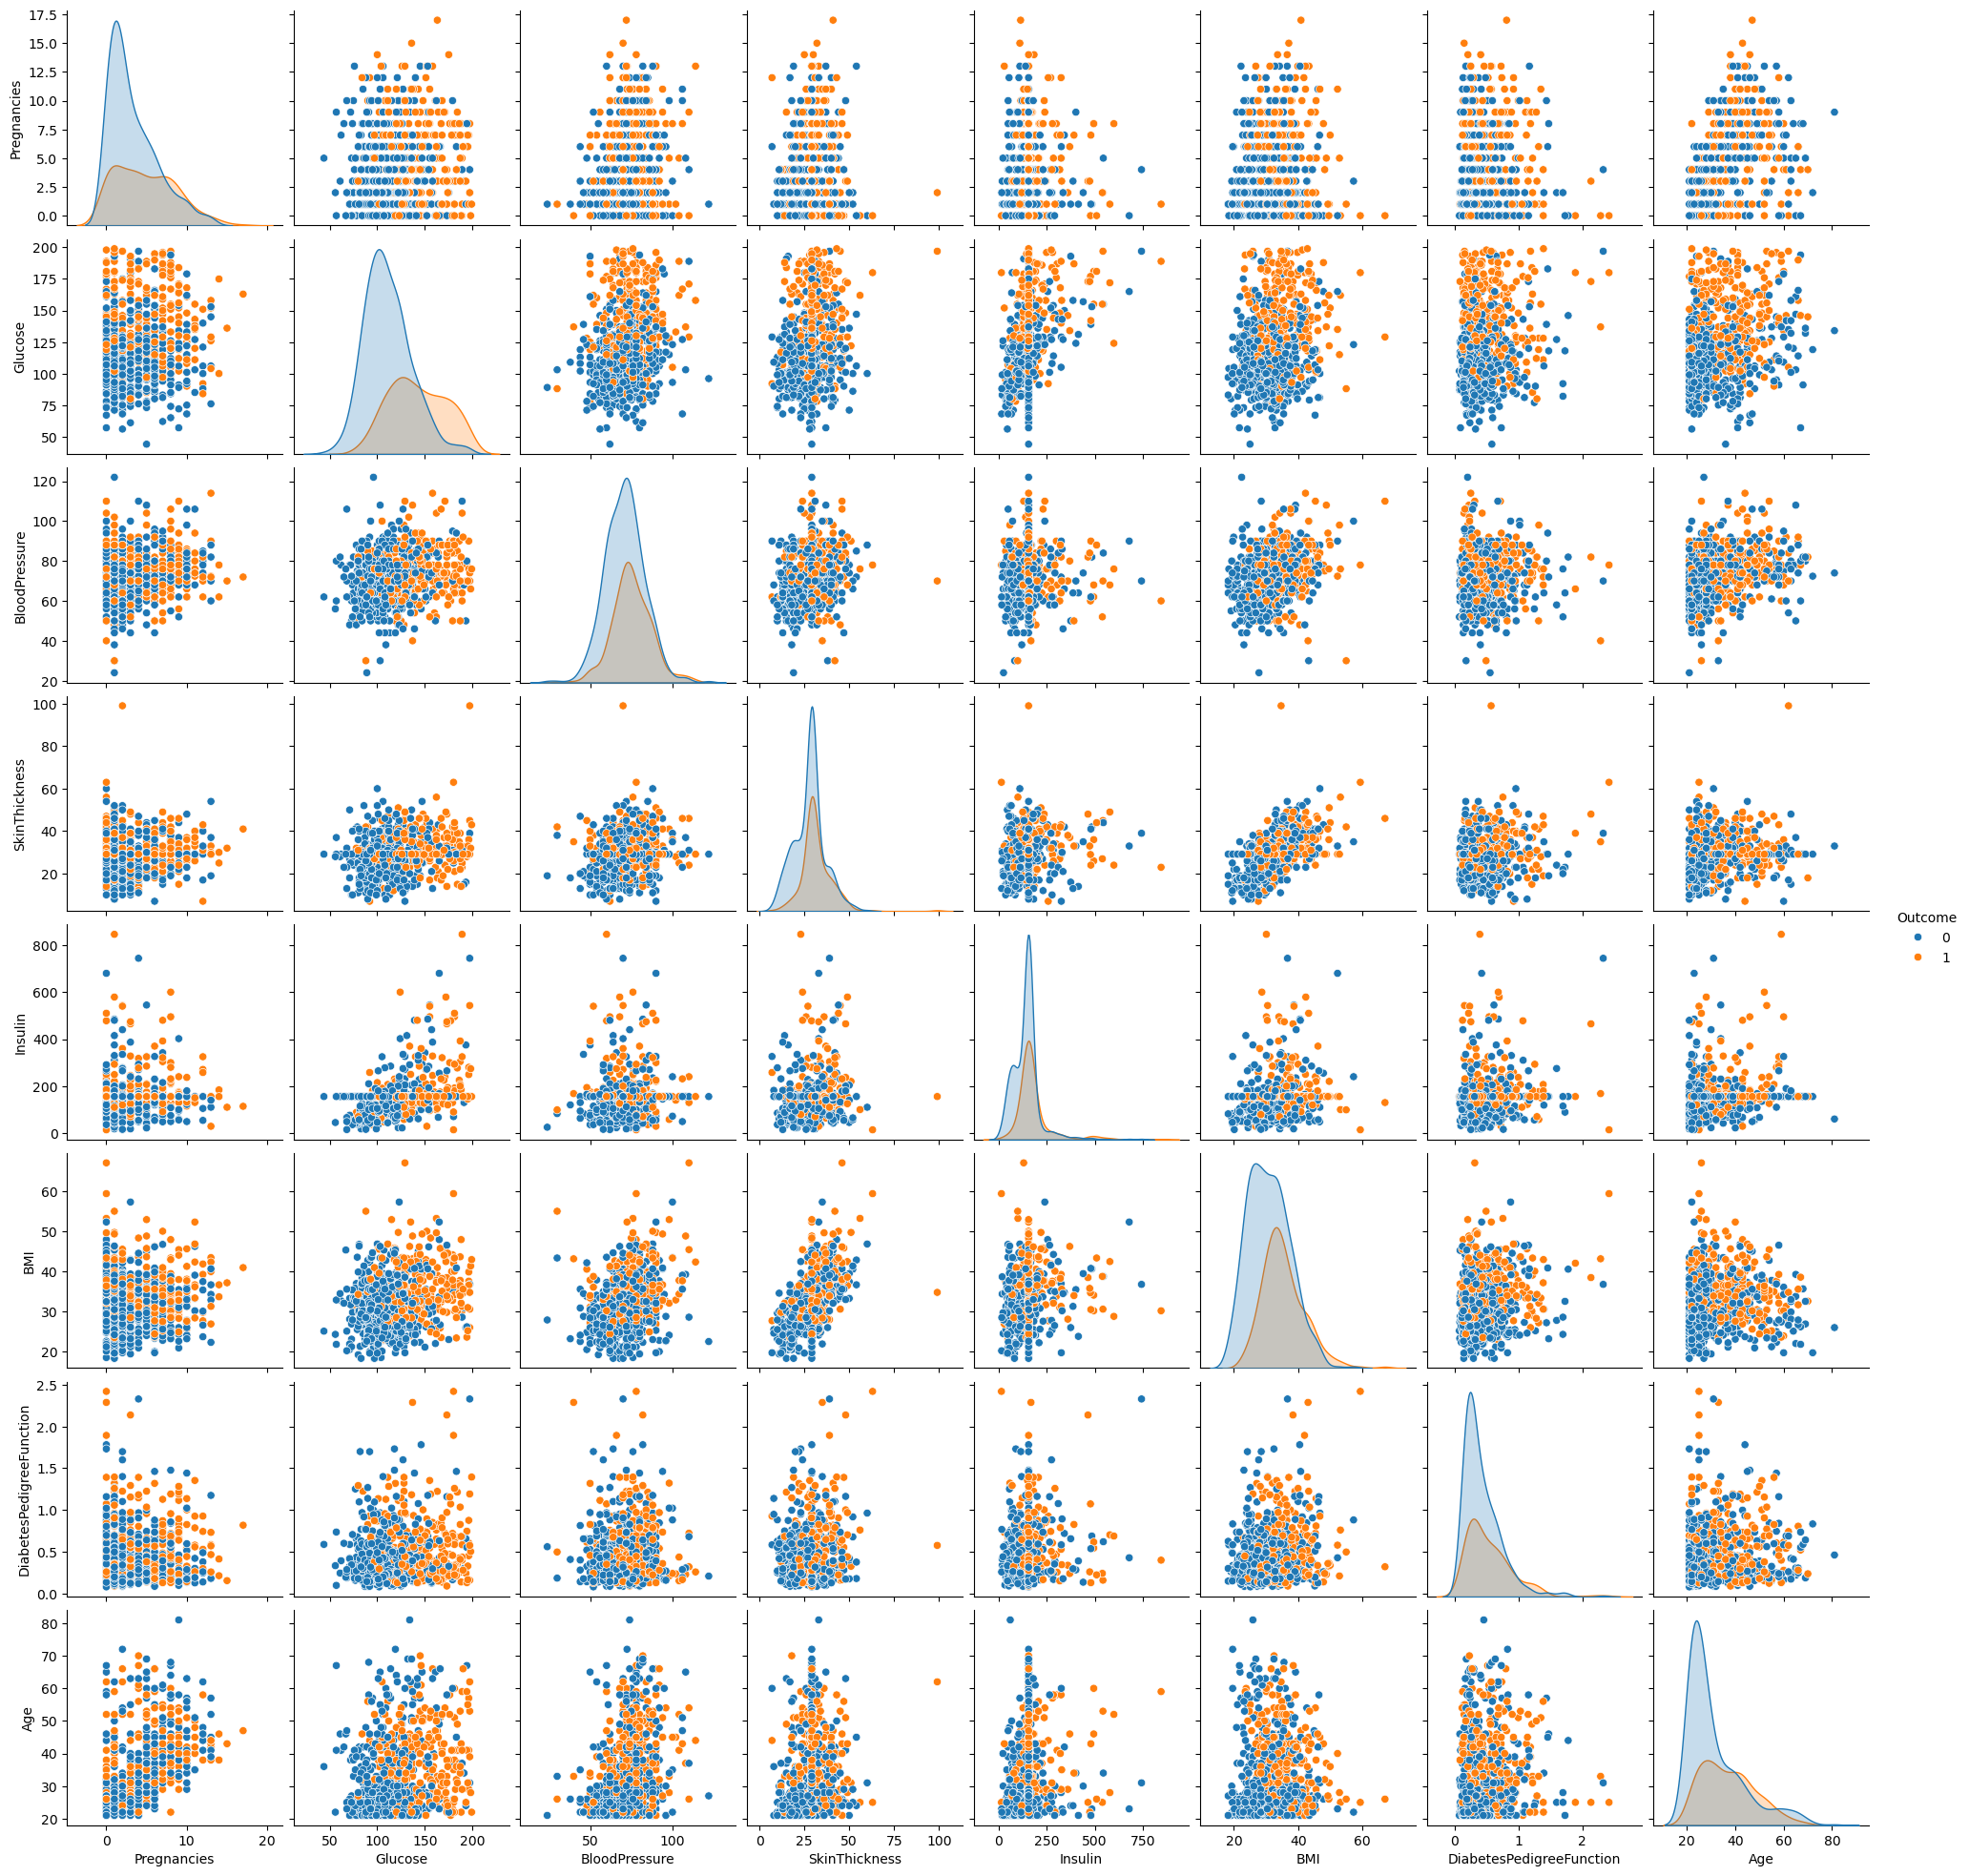

In [22]:
#Pairplot Showing 
#Healthy (Blue) 
#Diabetic (Orange) 

plots = sns.pairplot(data, hue='Outcome')

# Splitting Data For Train and Test

In [23]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train

array([[ 0.04199022,  0.80206845,  1.04107522, ..., -0.50756293,
        -0.8624721 , -0.5280582 ],
       [-0.83835649, -1.15568462, -1.01785625, ...,  0.67834788,
         0.10307026, -0.95072722],
       [ 0.33543913, -0.19339921,  0.13514537, ..., -0.02176814,
         0.55868556,  0.14821223],
       ...,
       [ 0.04199022, -0.39249274,  0.29985989, ..., -0.57900334,
        -1.07670181, -0.5280582 ],
       [-0.83835649,  1.96344739,  0.46457441, ...,  1.07841418,
         2.36304284, -0.95072722],
       [ 1.21578584, -1.25523138,  0.13514537, ...,  0.83551678,
        -0.05383038,  0.48634744]])

# Modelling

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [28]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Accuracy

In [29]:
# accuracy score on the training and testing data
pred_train = model.predict(X_train)
accuracy_score(pred_train,y_train)
print('Model Accuracy Training Score: {0:0.2f}'. format(accuracy_score(pred_train,y_train)*100)+ "%")

Model Accuracy Training Score: 100.00%


In [30]:
# accuracy score on the test data
pred_test = model.predict(X_test)
accuracy_score(pred_test,y_test)
print('Model Accuracy Test Score: {0:0.2f}'. format(accuracy_score(pred_test,y_test)*100)+ "%")

Model Accuracy Test Score: 76.47%


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[85 14]
 [22 32]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.59      0.64        54

    accuracy                           0.76       153
   macro avg       0.75      0.73      0.73       153
weighted avg       0.76      0.76      0.76       153



# Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10]
}

In [42]:
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best CV Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Best CV Score: 0.7729846904213521
Best Params: {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50}


In [44]:
# Use the best estimator directly
final_model = grid.best_estimator_

In [51]:
# Evaluate on test set
y_pred = final_model.predict(X_test)
print("Final Model Test Accuracy: {0:0.2f}" .format(accuracy_score(y_test, y_pred)*100) + "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Final Model Test Accuracy: 77.12%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.71      0.59      0.65        54

    accuracy                           0.77       153
   macro avg       0.75      0.73      0.74       153
weighted avg       0.77      0.77      0.77       153



# Prediction Model

# Saving the Trained Model

In [52]:
import joblib

# Save the final tuned model
joblib.dump(final_model, "diabetes_model.pkl")

# Load later
# model = joblib.load("diabetes_model.pkl")

['diabetes_model.pkl']